# Toy example

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from math import sin, cos, pi
import os

In [42]:
bkg_mean = -1
bkg_std = 2
MC_mean = -1
MC_std = 2.8
sig_mean = 2.8
sig_std = 0.5

# define correlation between m1, m2 and x.
k = 0.5
theta = pi/4

In [43]:
# Total number of events
N1 = 2000
# Total number of signal
N2 = 150

In [44]:
# data background
x1 = np.random.normal(bkg_mean, bkg_std, N1).astype(dtype=np.float32)
mask_CR1D = x1 < 1
mask_SR1D = x1 > 1
x2 = np.random.normal(bkg_mean, bkg_std, N1).astype(dtype=np.float32)
data = np.stack([x1, x2], axis = -1)
mask_CR = np.logical_not((data[:,0] > 1) & (data[:,1] > 1))
mask_SR = (data[:,0] > 1) & (data[:,1] > 1)

# MC background
x5 = np.random.normal(MC_mean, MC_std, N1).astype(dtype=np.float32)
mask_CR1D_MC = x5 < 1
mask_SR1D_MC = x5 > 1
x6 = np.random.normal(MC_mean, MC_std, N1).astype(dtype=np.float32)
MC = np.stack([x5, x6], axis = -1)
mask_CR_MC = np.logical_not((MC[:,0] > 1) & (MC[:,1] > 1))
mask_SR_MC = (MC[:,0] > 1) & (MC[:,1] > 1)

# signal
x3 = np.random.normal(sig_mean, sig_std, N2).astype(dtype=np.float32)
x4 = np.random.normal(sig_mean, sig_std, N2).astype(dtype=np.float32)

<function matplotlib.pyplot.close(fig=None)>

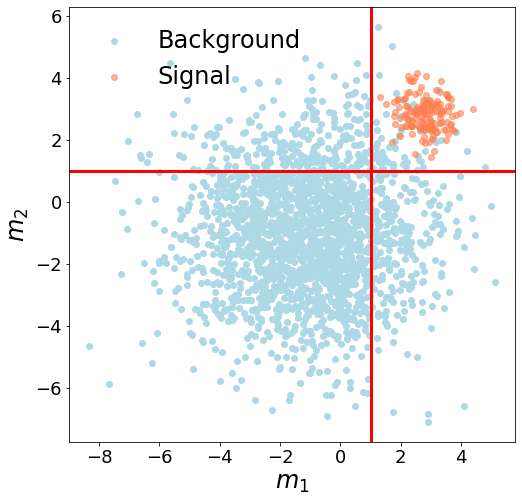

In [51]:
f1 = 24
f2 = 18


plt.figure(figsize=(8,8))
# Background
plt.scatter(x1, x2, alpha = 1, color="lightblue", label="Background", rasterized=True )
#plt.scatter(x5, x6, alpha = .5, color="red", label="MC", facecolors='none', edgecolors='g')
# Signal
plt.scatter(x3, x4, alpha = 0.6, color="coral", label="Signal", rasterized=True )
plt.xlabel(r'$m_1$', fontsize=f1)
plt.ylabel(r'$m_2$', fontsize=f1)
plt.axhline(y=1, color='r', linestyle='-', lw=3)
plt.axvline(x=1, color='r', linestyle='-', lw=3)
plt.xticks(fontsize = f2)
plt.yticks(fontsize = f2)
plt.legend(fontsize=f1, loc = "upper left", frameon = False)
plt.show
plt.savefig('toy_context.pdf')
plt.close

In [31]:
def X(k, theta, x1, x2, n, sigma=1):
    return np.random.normal(k*(cos(theta)*x1 + sin(theta)*x2), sigma, n).astype(dtype=np.float32)

In [32]:
k = 0.5
theta = pi/4
bkg_feature = X(k, theta, x1, x2, n=N1)
sig_feature = X(k, theta, x3, x4, n=N2)

<function matplotlib.pyplot.close(fig=None)>

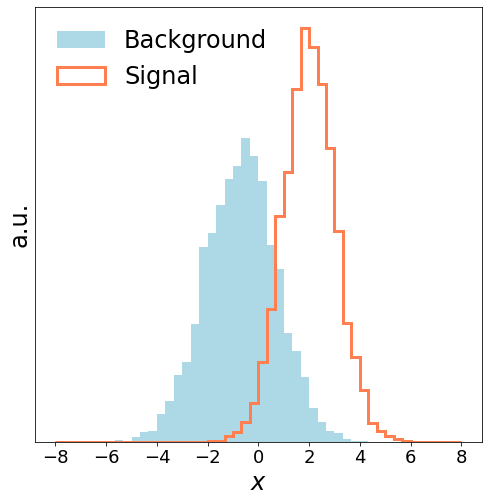

In [50]:
plt.figure(figsize=(8,8))
density = True
bins = np.linspace(-8, 8, 49)
# Background
plt.hist(bkg_feature, bins=bins, density=density,  histtype="stepfilled", alpha = 1, color="lightblue", label="Background")
# Signal
plt.hist(sig_feature, bins=bins, density=density, histtype="step", lw=3, alpha = 1, color="coral", label="Signal")
plt.xlabel(r'$x$', fontsize=f1)
plt.ylabel('a.u.', fontsize=f1)
plt.yticks([])
plt.xticks(fontsize = f2)
plt.legend(fontsize=f1, loc = "upper left", frameon = False)
plt.show
plt.savefig('toy_features.pdf')
plt.close